In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
# In addition, we’ll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Note
#You can only unzip a zipped tuple once before it is removed from the computer’s memory.
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [8]:
#Note
#The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f14d4e563335a9624b52bc87be69cca


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    # Create endpoint URL with each city.
city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | tabulbah
City not found. Skipping...
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | tessalit
Processing Record 11 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | darhan
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | liniere
City not found. Skipping...
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of 

Processing Record 33 of Set 4 | ranong
Processing Record 34 of Set 4 | victoria
Processing Record 35 of Set 4 | half moon bay
Processing Record 36 of Set 4 | peniche
Processing Record 37 of Set 4 | buta
Processing Record 38 of Set 4 | inirida
Processing Record 39 of Set 4 | yang talat
Processing Record 40 of Set 4 | heihe
Processing Record 41 of Set 4 | dhana
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | pevek
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | sechelt
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | ixtapa
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | alta floresta
Processing Record 50 of Set 4 | okhotsk
Processing Record 1 of Set 5 | tampere
Processing Record 2 of Set 5 | grindavik
Processing Record 3 of Set 5 | sao lourenco da serra
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | tsienyane
City not found. Skipping...
Processing Record 6 of Se

Processing Record 22 of Set 8 | solnechnyy
Processing Record 23 of Set 8 | novikovo
Processing Record 24 of Set 8 | kasongo-lunda
Processing Record 25 of Set 8 | necochea
Processing Record 26 of Set 8 | warrnambool
Processing Record 27 of Set 8 | pahalgam
Processing Record 28 of Set 8 | brownsville
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | nagato
Processing Record 31 of Set 8 | shushenskoye
Processing Record 32 of Set 8 | outlook
Processing Record 33 of Set 8 | hun
Processing Record 34 of Set 8 | miranda
Processing Record 35 of Set 8 | ratnagiri
Processing Record 36 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 37 of Set 8 | la reforma
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | merauke
Processing Record 41 of Set 8 | marcona
City not found. Skipping...
Processing Record 42 of Set 8 | mtwara
Processing Record 43 of Set 8 | torello
Processing Record 44 of Set 8 | ketchik

Processing Record 9 of Set 12 | havoysund
Processing Record 10 of Set 12 | ashland
Processing Record 11 of Set 12 | satitoa
City not found. Skipping...
Processing Record 12 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 12 | lumeje
Processing Record 14 of Set 12 | baykit
Processing Record 15 of Set 12 | hingoli
Processing Record 16 of Set 12 | kununurra
Processing Record 17 of Set 12 | honiara
Processing Record 18 of Set 12 | lake charles
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | kant
Processing Record 21 of Set 12 | kuala terengganu
Processing Record 22 of Set 12 | linqing
Processing Record 23 of Set 12 | berbera
Processing Record 24 of Set 12 | aleksandrov gay
Processing Record 25 of Set 12 | barguzin
Processing Record 26 of Set 12 | neiafu
Processing Record 27 of Set 12 | galle
Processing Record 28 of Set 12 | college
Processing Record 29 of Set 12 | kathu
Processing Record 30 of Set 12 | las vegas
Processing Record 31

In [12]:
len(city_data)

528

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.60,-124.16,52.00,76,75,10.29,US,2020-04-05 19:41:00
1,Vaini,-21.20,-175.20,73.40,83,75,5.82,TO,2020-04-05 19:40:28
2,Nikolskoye,59.70,30.79,30.20,74,1,4.47,RU,2020-04-05 19:39:34
3,Ribeira Grande,38.52,-28.70,60.80,77,75,10.29,PT,2020-04-05 19:40:24
4,Hilo,19.73,-155.09,73.40,88,90,5.82,US,2020-04-05 19:39:26
5,Atuona,-9.80,-139.03,81.59,76,22,14.38,PF,2020-04-05 19:40:26
6,Saskylakh,71.92,114.08,28.63,97,87,14.36,RU,2020-04-05 19:39:31
7,Tessalit,20.20,1.01,83.21,10,0,9.17,ML,2020-04-05 19:41:05
8,Darhan,49.49,105.92,29.30,65,100,7.49,MN,2020-04-05 19:48:54
9,Upernavik,72.79,-56.15,13.41,80,74,1.97,GL,2020-04-05 19:40:57


In [14]:
new_column_order = ['City', 'Country','Date','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2020-04-05 19:41:00,40.60,-124.16,52.00,76,75,10.29
1,Vaini,TO,2020-04-05 19:40:28,-21.20,-175.20,73.40,83,75,5.82
2,Nikolskoye,RU,2020-04-05 19:39:34,59.70,30.79,30.20,74,1,4.47
3,Ribeira Grande,PT,2020-04-05 19:40:24,38.52,-28.70,60.80,77,75,10.29
4,Hilo,US,2020-04-05 19:39:26,19.73,-155.09,73.40,88,90,5.82
...,...,...,...,...,...,...,...,...,...
523,Las Vegas,US,2020-04-05 19:45:47,36.17,-115.14,71.01,26,1,17.22
524,Nabire,ID,2020-04-05 19:49:47,-3.37,135.48,74.64,88,99,3.38
525,Kochubey,RU,2020-04-05 19:49:47,44.39,46.58,51.35,69,99,5.59
526,Bodden Town,KY,2020-04-05 19:49:47,19.28,-81.25,87.80,66,20,9.17


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1586116189.2759748

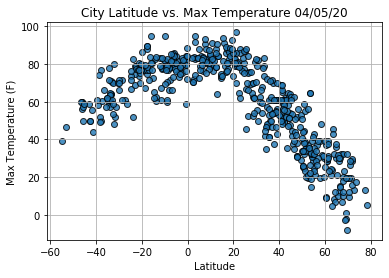

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

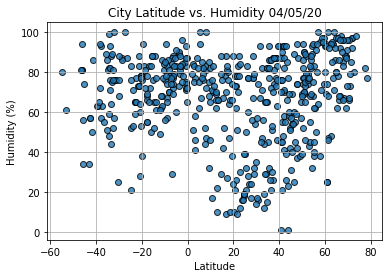

In [20]:
# Build the scatter plots for latitude vs. humidity.             --------------------6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

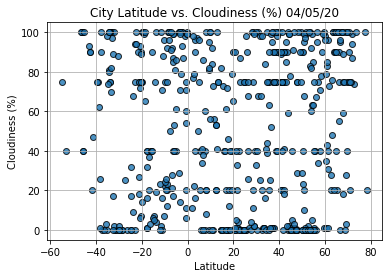

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

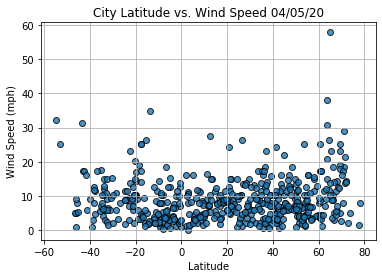

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data                -------------6.4.2
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                    Hithadhoo
Country                        MV
Date          2020-04-05 19:40:41
Lat                          -0.6
Lng                         73.08
Max Temp                    82.96
Humidity                       75
Cloudiness                      6
Wind Speed                   6.98
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
523     True
524    False
525     True
526     True
527     True
Name: Lat, Length: 528, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2020-04-05 19:41:00,40.60,-124.16,52.00,76,75,10.29
2,Nikolskoye,RU,2020-04-05 19:39:34,59.70,30.79,30.20,74,1,4.47
3,Ribeira Grande,PT,2020-04-05 19:40:24,38.52,-28.70,60.80,77,75,10.29
4,Hilo,US,2020-04-05 19:39:26,19.73,-155.09,73.40,88,90,5.82
6,Saskylakh,RU,2020-04-05 19:39:31,71.92,114.08,28.63,97,87,14.36


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
#plot_linear_regression(x_values, y_values,'title', 'Max Temp',(10,40))

In [29]:
y_values

0      52.00
2      30.20
3      60.80
4      73.40
6      28.63
       ...  
522    75.20
523    71.01
525    51.35
526    87.80
527    44.29
Name: Max Temp, Length: 355, dtype: float64

In [30]:
x_values

0      40.60
2      59.70
3      38.52
4      19.73
6      71.92
       ...  
522     7.92
523    36.17
525    44.39
526    19.28
527    33.72
Name: Lat, Length: 355, dtype: float64

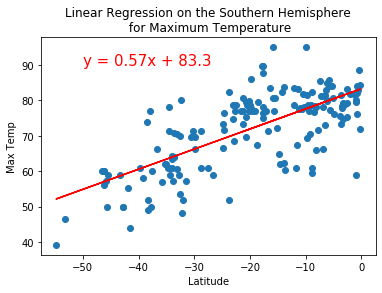

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

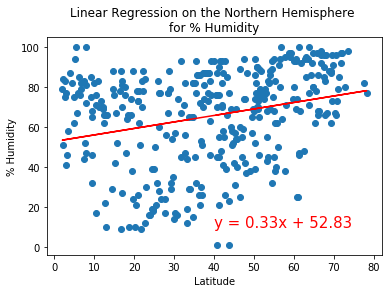

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

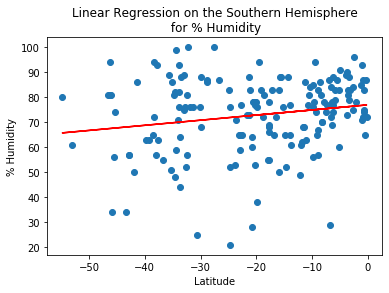

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

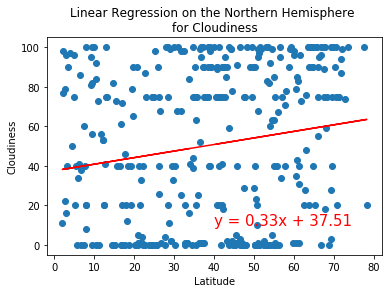

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 'Cloudiness',(40,10))

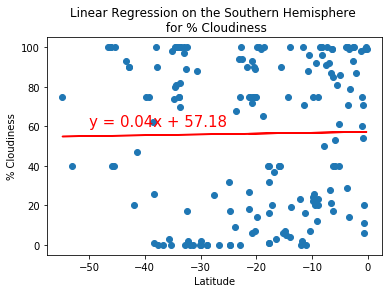

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

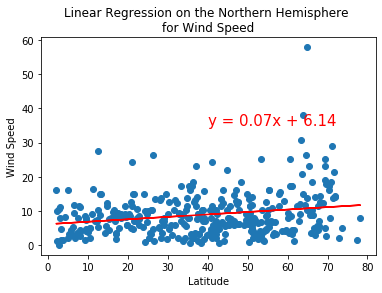

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

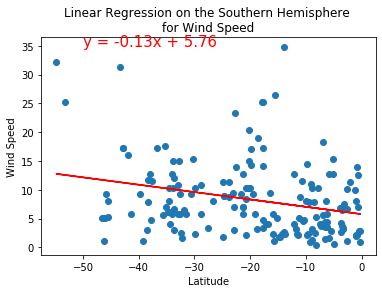

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

In [38]:
import gmaps